In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
from scipy import signal
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import random
from sklearn import datasets, tree, linear_model, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from pandas.plotting import autocorrelation_plot
from sklearn.manifold import TSNE
import os
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [77]:
data = pd.read_csv('emotions.csv')

In [5]:
data.head(3)

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3        1.07       0.411   
1       28.80      33.1      32.0      25.8      22.8        6.55       1.680   
2        8.90      29.4    -416.0      16.7      23.7       79.90       3.360   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b     label  
0       23.5     -215.0     280.00     -162.0     -162.0     280.00  NEGATIVE  
1      -23.3      182.0       2.57      -31.6      -31.6       2.57   NEUTRAL  
2      462.0     -267.0     281.00     -148.0     -148.0     281.00  POSITIVE  

[3 rows x 2549 columns]

In [55]:
# Convert labels to numerical values
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
data['label'] = data['label'].map(label_mapping)

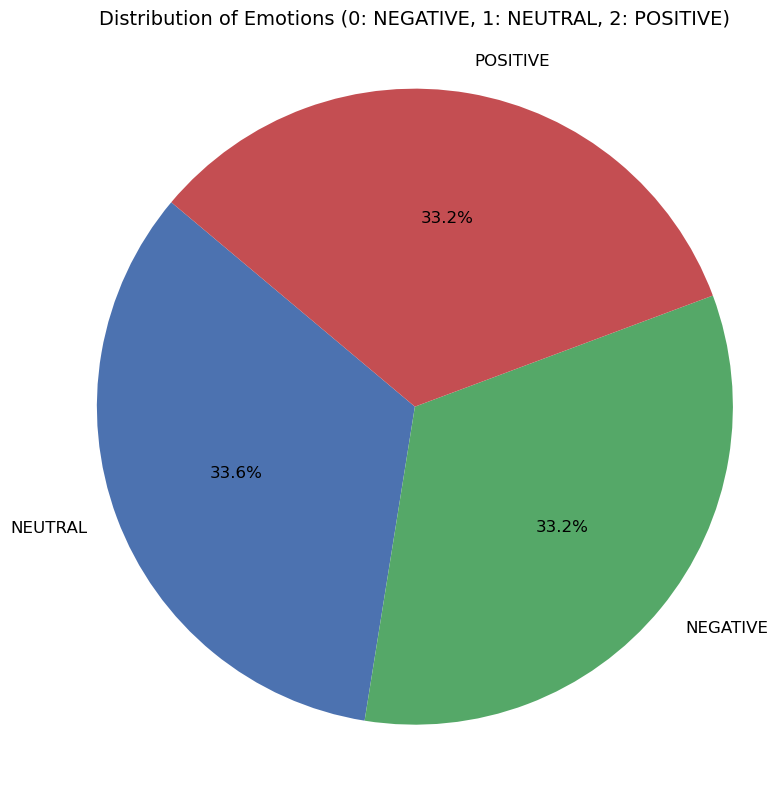

In [63]:
# Visualization using a Pie Chart


# Count the occurrences of each emotion
emotion_counts = data['label'].value_counts()

# Define emotional labels
emotional_labels = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}

# Map numerical labels to emotional labels
emotion_labels = [emotional_labels[label] for label in emotion_counts.index]

colors = ['#4C72B0', '#55A868', '#C44E52']
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_labels, autopct='%1.1f%%',
        startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title("Distribution of Emotions (0: NEGATIVE, 1: NEUTRAL, 2: POSITIVE)", fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.show()

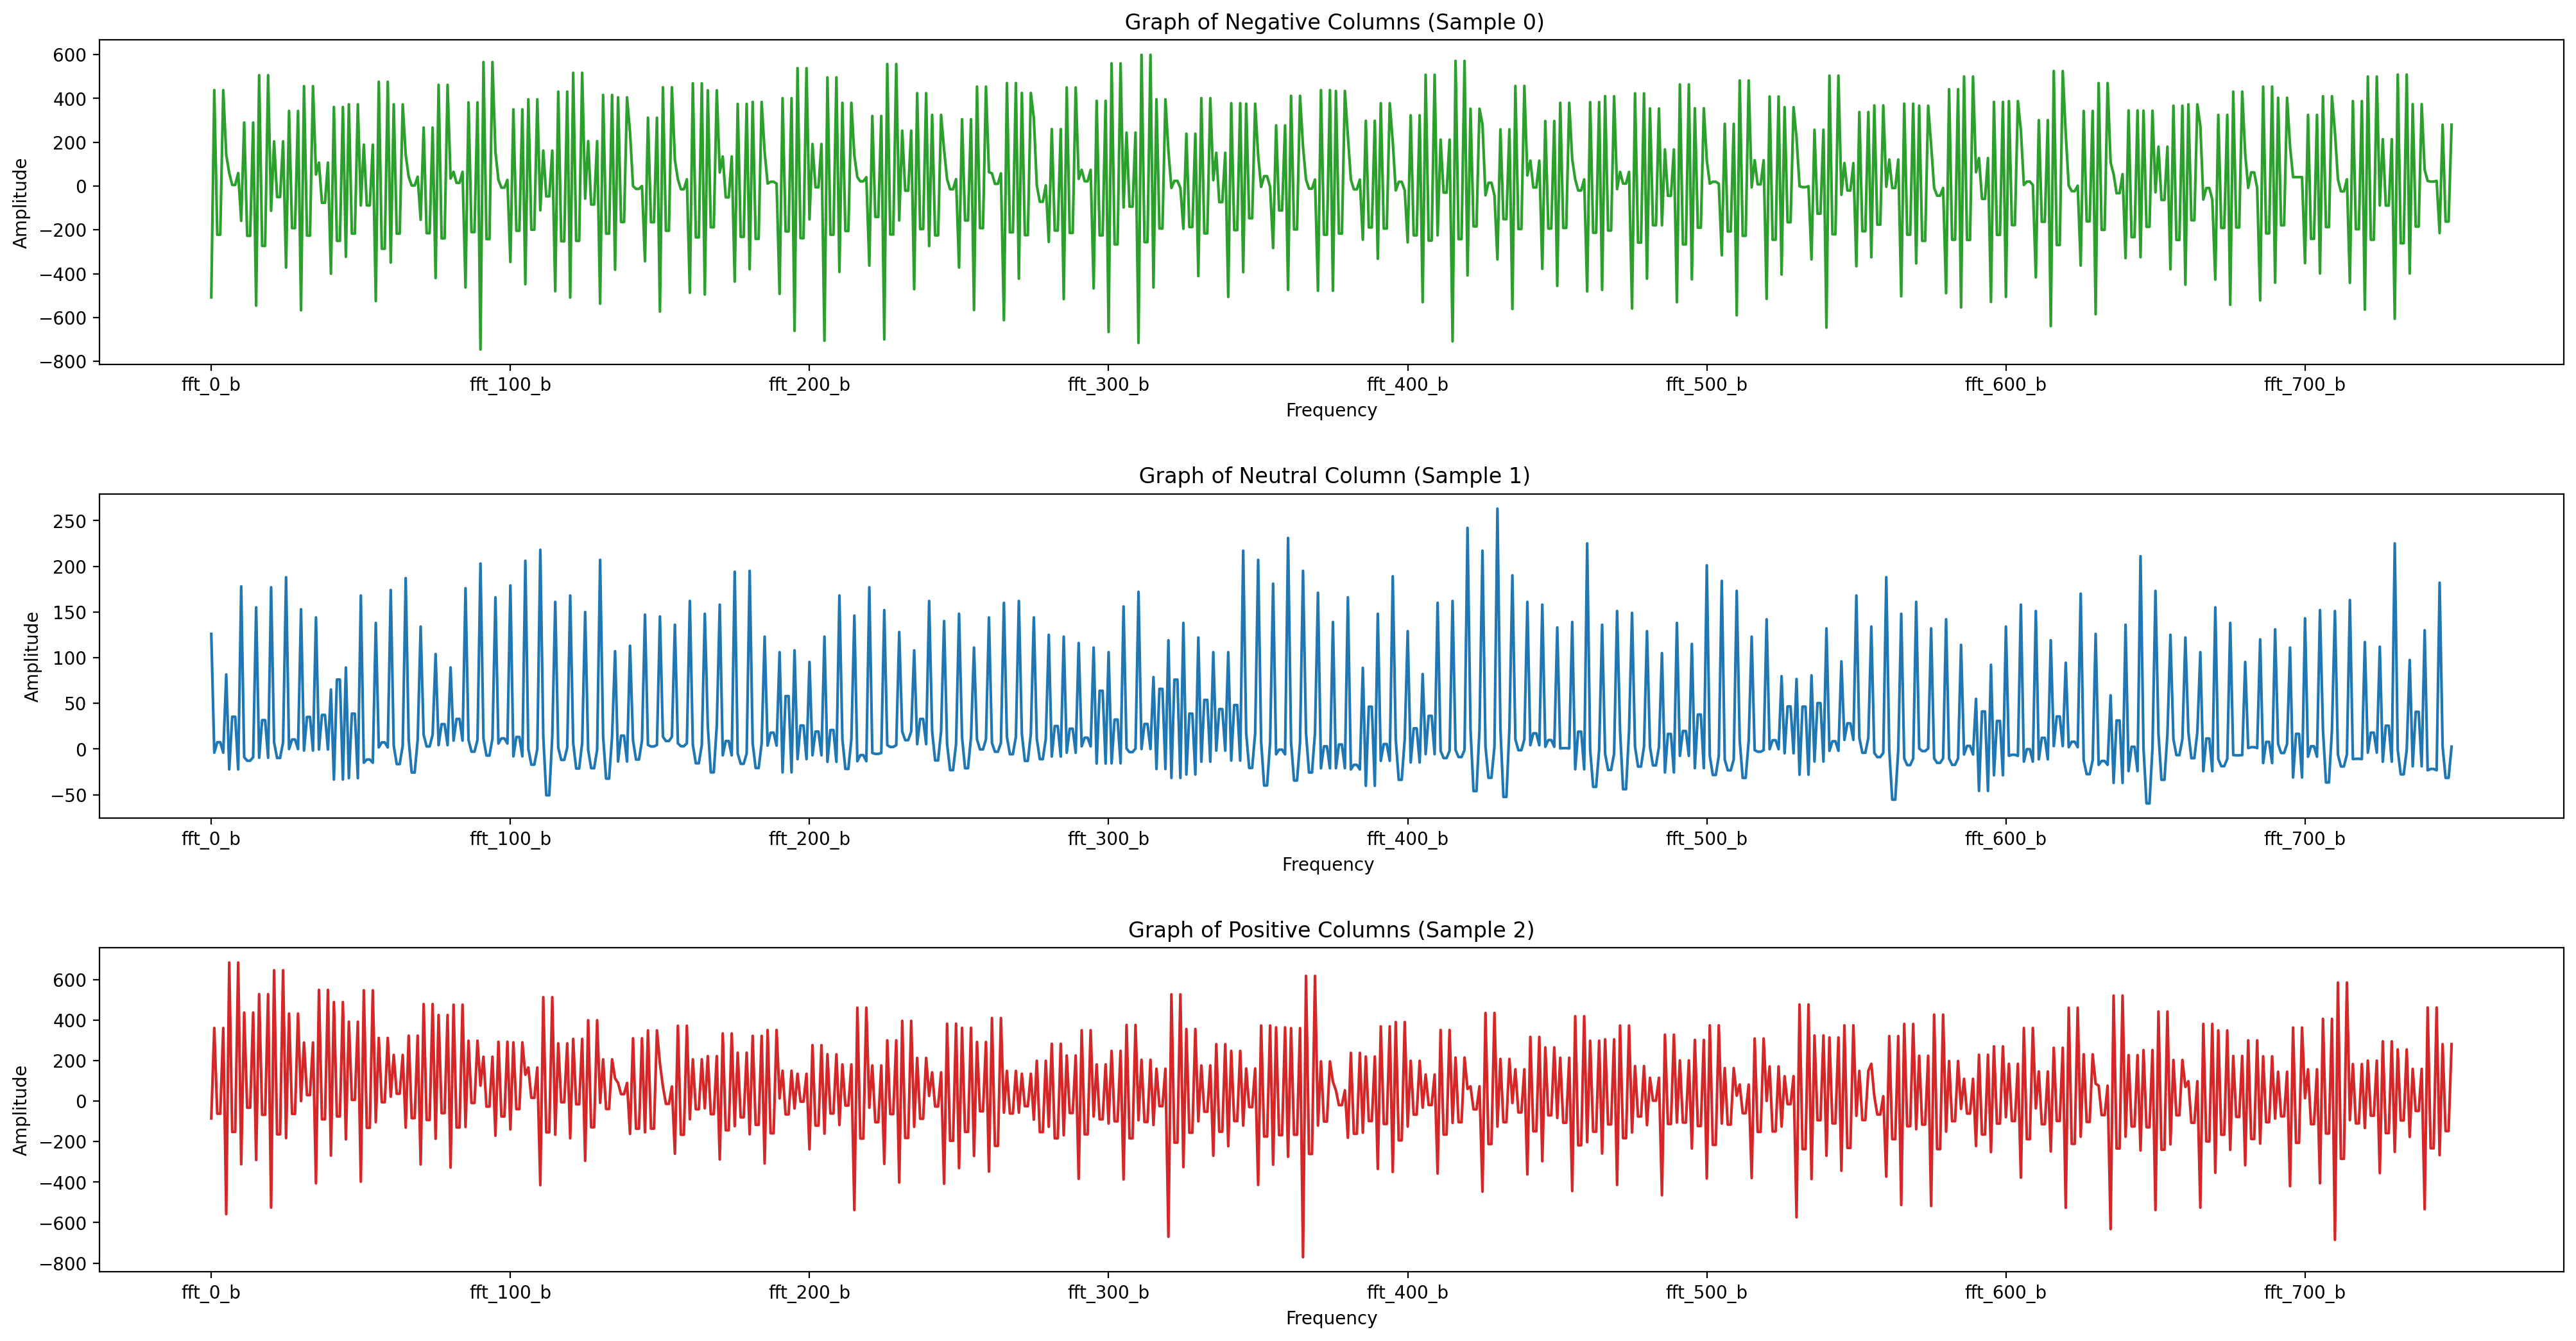

In [73]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(24, 12))

data.loc[1, 'fft_0_b':'fft_749_b'].plot(title=' Graph of Neutral Column (Sample 1)', color='tab:blue', ax=axes[1])
axes[1].set_xlabel('Frequency ')
axes[1].set_ylabel('Amplitude')
data.loc[2, 'fft_0_b':'fft_749_b'].plot(title='Graph of Positive Columns (Sample 2)', color='tab:red', ax=axes[2])
axes[2].set_xlabel('Frequency')
axes[2].set_ylabel('Amplitude')
data.loc[0, 'fft_0_b':'fft_749_b'].plot(title=' Graph of Negative Columns (Sample 0)', color='tab:green', ax=axes[0])
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Amplitude')

plt.subplots_adjust(left=0.1, bottom=0.1, 
                    right=0.9, top=0.9, 
                    wspace=0.4, hspace=0.4)

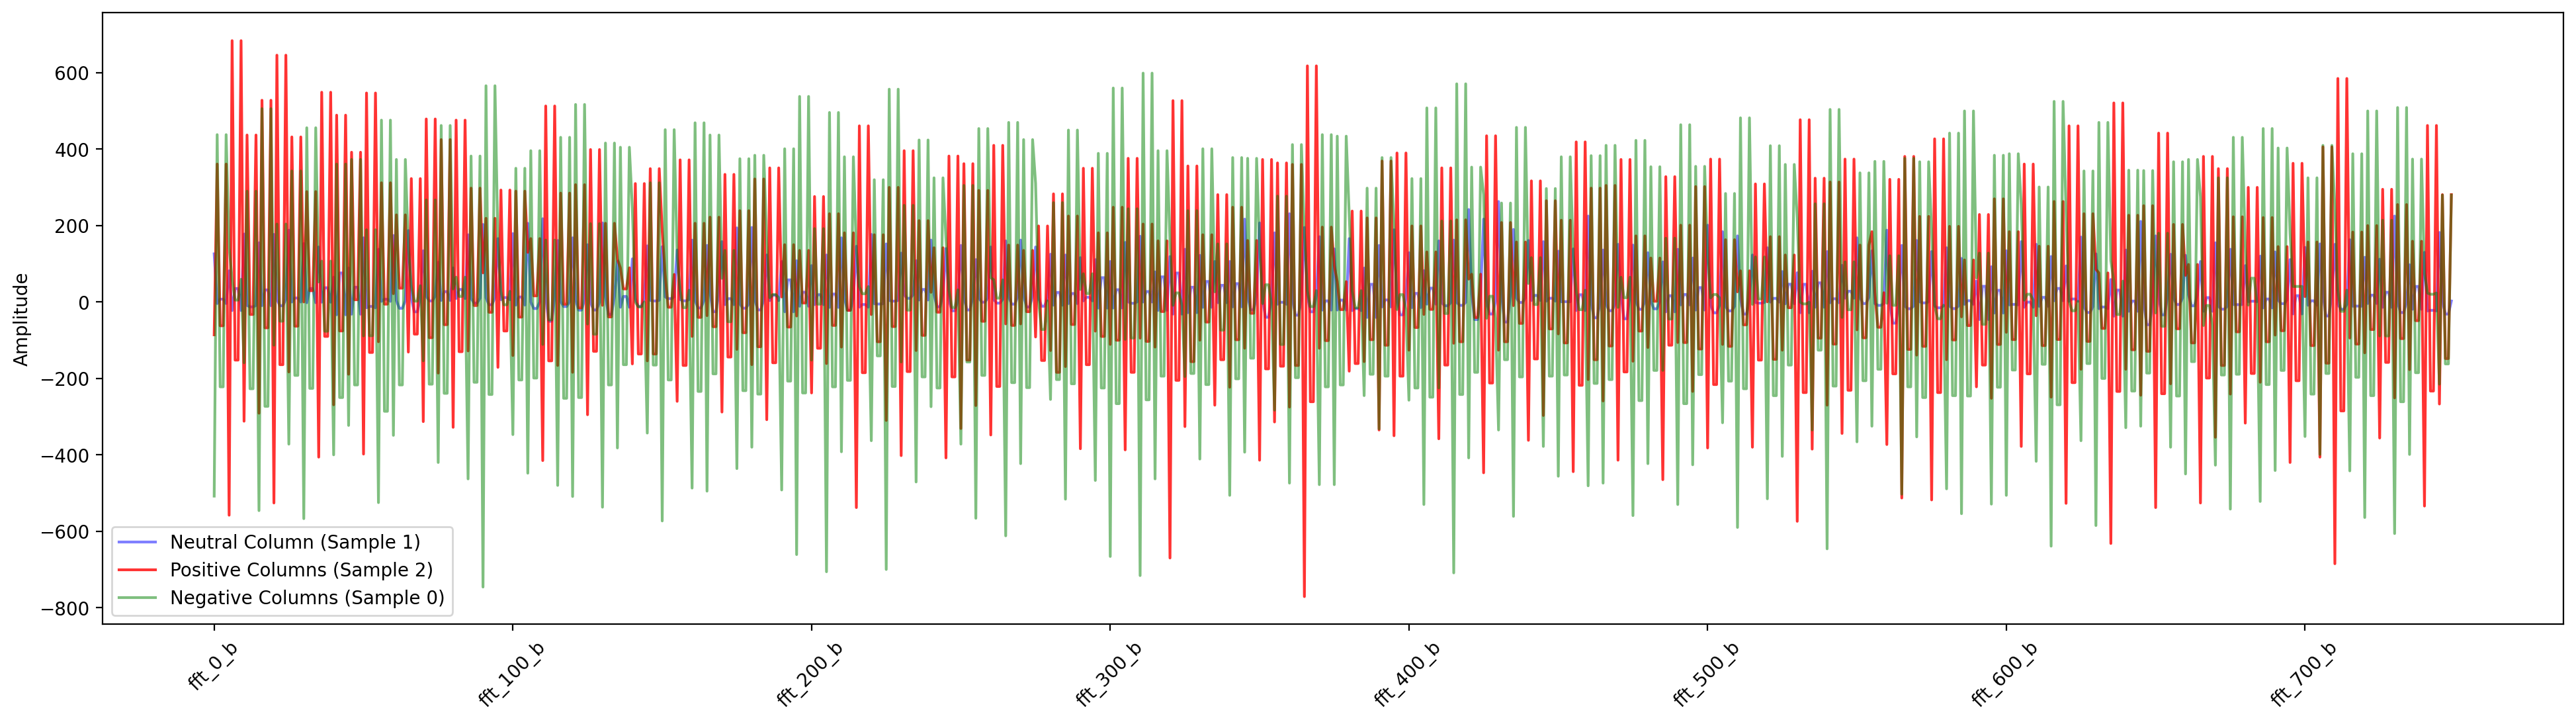

In [29]:
# Plotting the signals for 3 different samples for better understanding
plt.figure(dpi=200, figsize=(24, 6))

plt.plot(data.loc[1, 'fft_0_b':'fft_749_b'], label='Neutral Column (Sample 1)', color='blue', alpha=.5)
plt.plot(data.loc[2, 'fft_0_b':'fft_749_b'], label='Positive Columns (Sample 2)', color='red', alpha=.8)
plt.plot(data.loc[0, 'fft_0_b':'fft_749_b'], label='Negative Columns (Sample 0)', color='green', alpha=.5)

plt.xticks(np.arange(0, len(data.loc[0, 'fft_0_b':'fft_749_b']) + 1, 100), rotation=45)
plt.legend(loc='best')
plt.ylabel('Amplitude') 
plt.show()

In [79]:
# Normalization (e.g., z-score normalization)
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

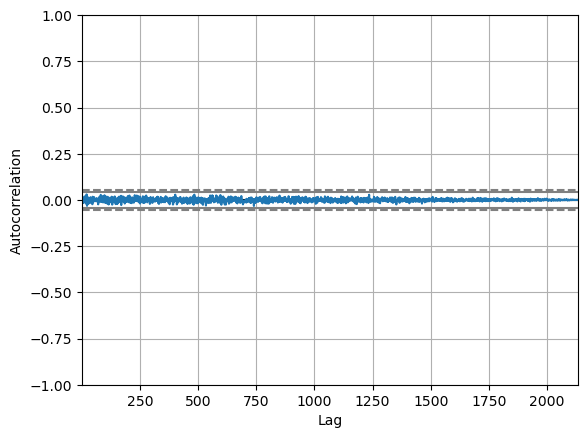

In [9]:
# autocorrelation
fft_data=data.loc[:, 'fft_0_b':'fft_749_b']
autocorrelation_plot(fft_data)
plt.show()

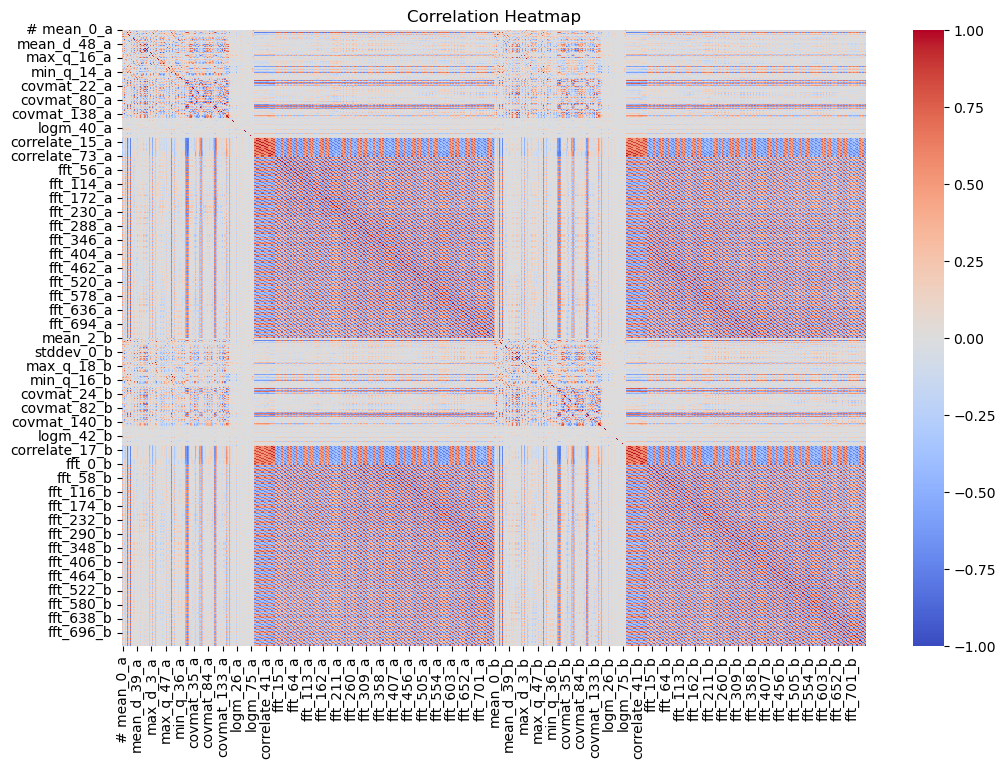

In [47]:
# Correlation Heatmap
correlation_matrix = data.drop('label', axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

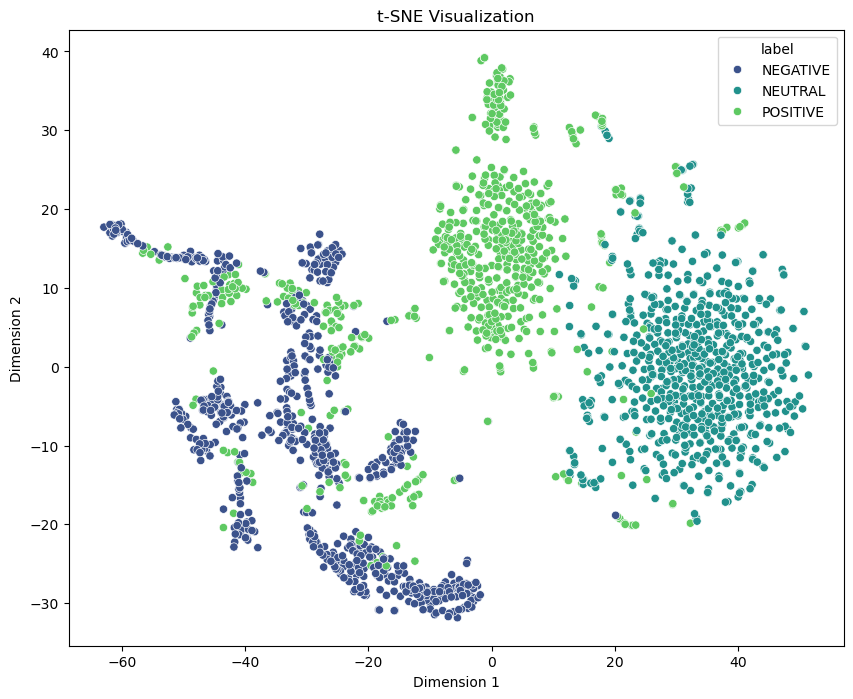

In [81]:
# t-SNE Visualization
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data.drop('label', axis=1))
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['label'] = data['label']
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='label', data=tsne_df, palette='viridis')
plt.title("t-SNE Visualization")
plt.show()

In [39]:
from sklearn.decomposition import PCA
features_only = data.drop("label", axis=1)
labels = data["label"]
X_train_flat = X_train.values.reshape(X_train.shape[0], -1)
X_test_flat = X_test.values.reshape(X_test.shape[0], -1)
pca = PCA(n_components = 20)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)
pca_vectors = pca.fit_transform(features_only)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

Explained Variance ratio by Principal Component  1  :  0.36772564117538786
Explained Variance ratio by Principal Component  2  :  0.09553894257232645
Explained Variance ratio by Principal Component  3  :  0.08436069000482506
Explained Variance ratio by Principal Component  4  :  0.060856651819701554
Explained Variance ratio by Principal Component  5  :  0.04745373292625122
Explained Variance ratio by Principal Component  6  :  0.030823052518471634
Explained Variance ratio by Principal Component  7  :  0.02472162086092121
Explained Variance ratio by Principal Component  8  :  0.013753055070710113
Explained Variance ratio by Principal Component  9  :  0.012408702720767065
Explained Variance ratio by Principal Component  10  :  0.012103653571998016
Explained Variance ratio by Principal Component  11  :  0.009557100572591687
Explained Variance ratio by Principal Component  12  :  0.009164311003015948
Explained Variance ratio by Principal Component  13  :  0.008740057133444765
Explained Var

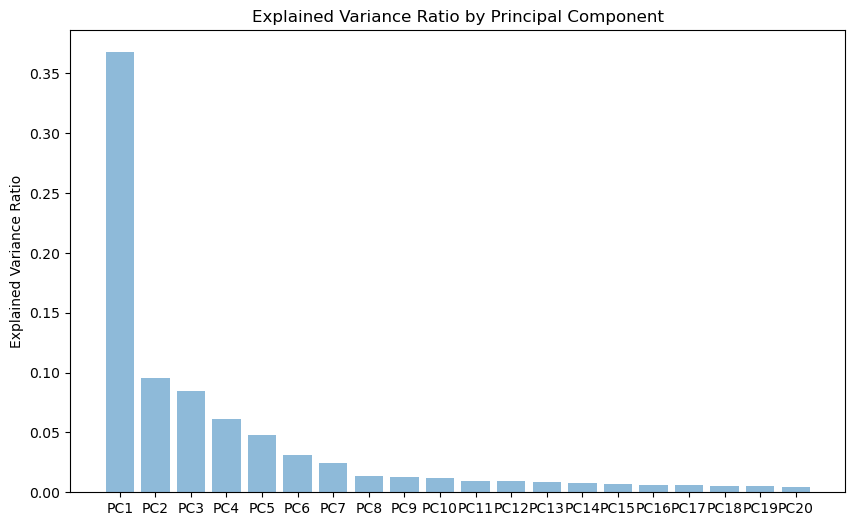

In [83]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, 21), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 21), [f'PC{i}' for i in range(1, 21)])
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

C:\Users\zhujianan\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


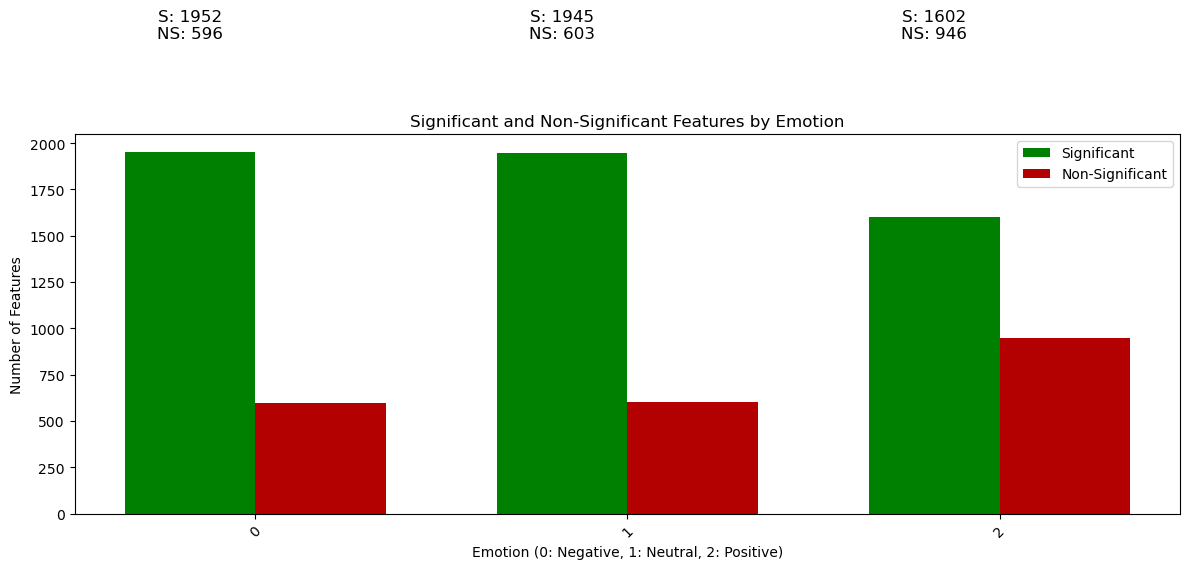

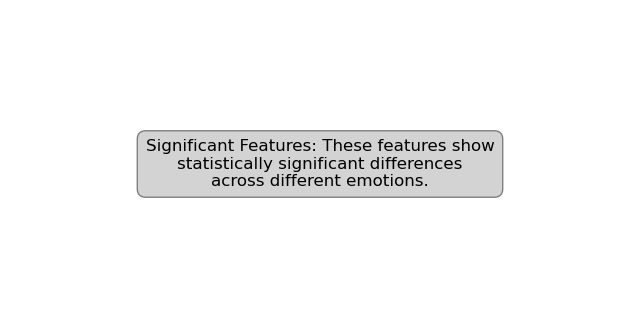

In [69]:
# Define emotions based on unique labels in the dataset
emotions = data['label'].unique()
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define colors for significant and non-significant features
significant_color = 'green'
non_significant_color =(0.7, 0, 0, 1)

# Create a dictionary to store the number of significant and non-significant features for each emotion
num_features = {emotion: {'significant': 0, 'non-significant': 0} for emotion in emotions}

# Perform t-tests and count significant features for each emotion
for emotion in emotions:
    subset = data[data['label'] == emotion]
    for feature in data.columns[:-1]:
        _, p_value = ttest_ind(subset[feature], data[feature])
        if p_value < 0.05:
            num_features[emotion]['significant'] += 1
        else:
            num_features[emotion]['non-significant'] += 1

# Extract emotion labels and corresponding feature counts
emotion_labels = list(num_features.keys())
significant_counts = [num_features[emotion]['significant'] for emotion in emotion_labels]
non_significant_counts = [num_features[emotion]['non-significant'] for emotion in emotion_labels]

# Create a bar chart to visualize the number of significant and non-significant features for each emotion
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(emotion_labels))

plt.bar(index, significant_counts, bar_width, label='Significant', color=significant_color)
plt.bar(index + bar_width, non_significant_counts, bar_width, label='Non-Significant', color=non_significant_color)

# Add labels and title
plt.xlabel('Emotion (0: Negative, 1: Neutral, 2: Positive)')
plt.ylabel('Number of Features')
plt.title('Significant and Non-Significant Features by Emotion')
plt.xticks(index + bar_width / 2, emotion_labels)
plt.legend()

# Display the counts above the bars
for i, (significant_count, non_significant_count) in enumerate(zip(significant_counts, non_significant_counts)):
    plt.text(i, significant_count + non_significant_count + 1, f'S: {significant_count}\nNS: {non_significant_count}', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

# Explanation for significant features
plt.figure(figsize=(8, 4))
plt.text(0.5, 0.5, 'Significant Features: These features show\nstatistically significant differences\nacross different emotions.',
         ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))
plt.axis('off')

plt.show()

In [35]:
# Split the data into training and testing sets
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


*		Classification Report GNB:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78       201
           1       0.67      0.96      0.79       231
           2       0.52      0.32      0.40       208

    accuracy                           0.68       640
   macro avg       0.67      0.67      0.66       640
weighted avg       0.67      0.68      0.66       640


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       201
           1       0.98      0.98      0.98       231
           2       0.93      0.94      0.94       208

    accuracy                           0.96       640
   macro avg       0.96      0.96      0.96       640
weighted avg       0.96      0.96      0.96       640


*		Classification Report LR:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       201
           1       1.00      0.99 

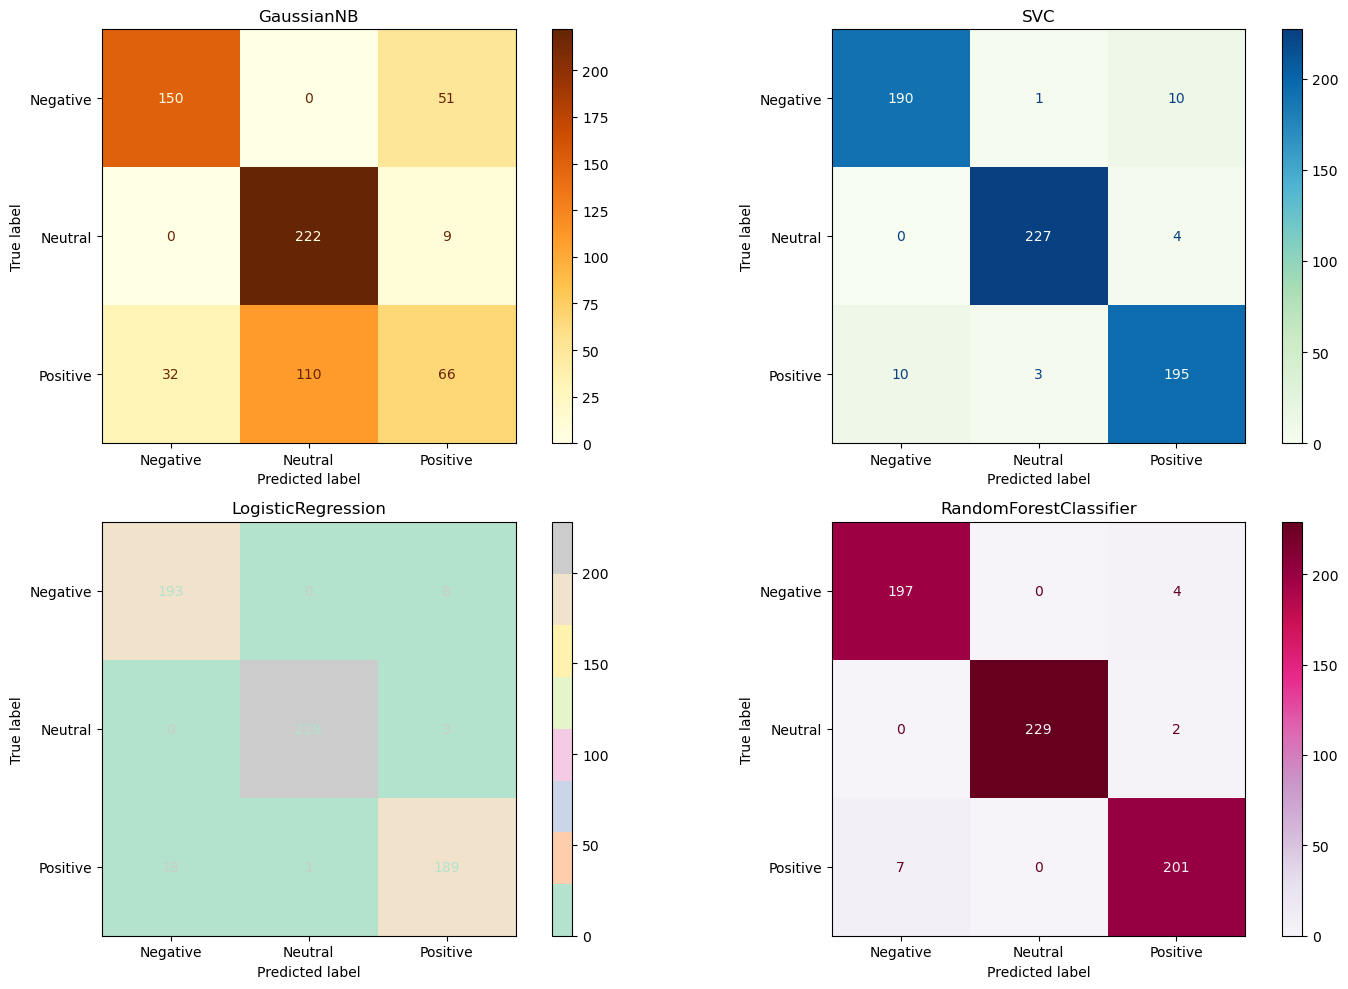

In [57]:
#Training our dataset on different Classifiers to check the results and creating their classification reports
#NAves Bayes Clssifier
names1 = ["Negative","Neutral","Positive"]
Classifier_gnb = GaussianNB().fit(X_train, y_train)
pred_gnb = Classifier_gnb.predict(X_test)
print ('\n*\t\tClassification Report GNB:\n', classification_report(y_test, pred_gnb))
confusion_matrix_graph = confusion_matrix(y_test, pred_gnb)
### Support Vector Machine

Classifier_svm = svm.SVC(kernel='linear').fit(X_train, y_train)
pred_svm = Classifier_svm.predict(X_test)
print ('\n*\t\tClassification Report SVM:\n', classification_report(y_test, pred_svm))
confusion_matrix_graph = confusion_matrix(y_test, pred_svm)
### Logistic Regression

Classifier_LR = linear_model.LogisticRegression(solver = 'liblinear', C = 75).fit(X_train,y_train)
pred_LR = Classifier_LR.predict(X_test)
print ('\n*\t\tClassification Report LR:\n', classification_report(y_test, pred_LR))
confusion_matrix_graph = confusion_matrix(y_test, pred_LR)
### Decision Tree Regressor

Classifier_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
pred_dt = Classifier_dt.predict(X_test)
print ('\n*\t\tClassification Report Deccsion Tree:\n', classification_report(y_test, pred_dt))
confusion_matrix_graph = confusion_matrix(y_test, pred_dt)
### Random Forest

Classifier_forest = RandomForestClassifier(n_estimators = 50, random_state = 0).fit(X_train,y_train)
pred_fr = Classifier_dt.predict(X_test)


print ('\n*\t\tClassification Report Random Forest:\n', classification_report(y_test, pred_fr))
confusion_matrix_graph = confusion_matrix(y_test, pred_fr)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
classifiers = [GaussianNB(),svm.SVC(kernel='linear'),
               linear_model.LogisticRegression(solver = 'liblinear', C = 75),
               RandomForestClassifier(n_estimators = 50, random_state = 0)]
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 假设你已有：classifiers（分类器列表）、X_train、X_test、y_train、y_test、axes（子图）、names1（标签名）

colors = ['YlOrBr', 'GnBu', 'Pastel2', 'PuRd']

for cls in classifiers:
    cls.fit(X_train, y_train)

for cls, ax, c in zip(classifiers, axes.flatten(), colors):
    # 预测并生成混淆矩阵
    y_pred = cls.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # 使用 ConfusionMatrixDisplay 替代 plot_confusion_matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names1)
    disp.plot(ax=ax, cmap=c, colorbar=True)  # colorbar=False 避免重复 colorbar
    ax.set_title(type(cls).__name__)

plt.tight_layout()
plt.show()

In [59]:
# Build a fully connected neural network (MLP) model for multi-class classification

# Build the advanced neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=70, batch_size=32, verbose=2)

Epoch 1/70
38/38 - 1s - 27ms/step - accuracy: 0.7611 - loss: 1.1454 - val_accuracy: 0.8997 - val_loss: 0.7076
Epoch 2/70
38/38 - 0s - 5ms/step - accuracy: 0.8575 - loss: 0.9154 - val_accuracy: 0.9064 - val_loss: 0.6108
Epoch 3/70
38/38 - 0s - 5ms/step - accuracy: 0.8852 - loss: 0.6624 - val_accuracy: 0.9164 - val_loss: 0.3745
Epoch 4/70
38/38 - 0s - 5ms/step - accuracy: 0.8902 - loss: 0.5183 - val_accuracy: 0.9365 - val_loss: 0.2568
Epoch 5/70
38/38 - 0s - 5ms/step - accuracy: 0.9170 - loss: 0.3798 - val_accuracy: 0.9331 - val_loss: 0.3070
Epoch 6/70
38/38 - 0s - 5ms/step - accuracy: 0.9111 - loss: 0.2925 - val_accuracy: 0.9231 - val_loss: 0.3370
Epoch 7/70
38/38 - 0s - 5ms/step - accuracy: 0.9212 - loss: 0.2387 - val_accuracy: 0.9532 - val_loss: 0.2782
Epoch 8/70
38/38 - 0s - 5ms/step - accuracy: 0.9145 - loss: 0.3058 - val_accuracy: 0.9298 - val_loss: 0.4060
Epoch 9/70
38/38 - 0s - 5ms/step - accuracy: 0.9313 - loss: 0.3546 - val_accuracy: 0.9197 - val_loss: 0.2078
Epoch 10/70
38/38 

In [61]:
# Evaluate the model
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 96.562%


In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         652,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,057,483 (7.85 MB)

 Trainable params: 685,827 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,371,656 (5.23 MB)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


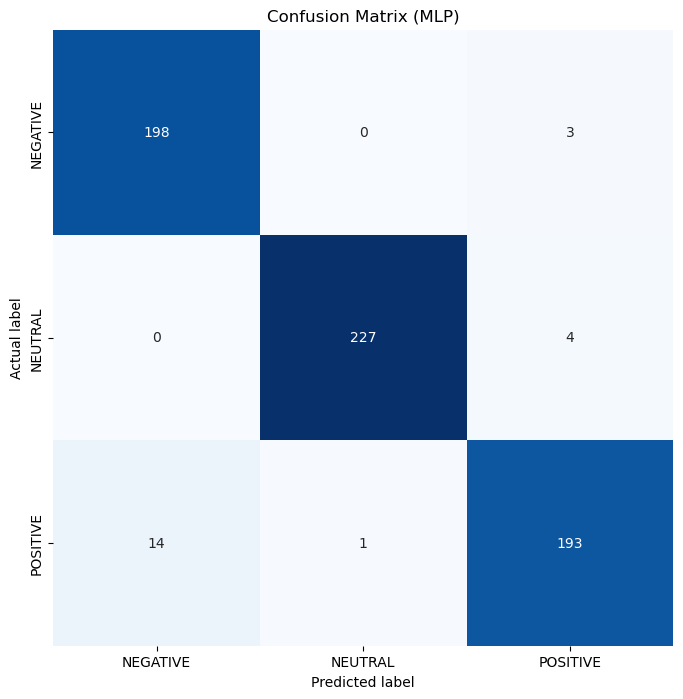

In [67]:
# Make predictions
y_pred = np.argmax(model.predict(X_test), axis=-1)
# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix (MLP)')
plt.show()

In [93]:
def plot_accuracy_loss(train_losses, train_accuracies, val_losses, val_accuracies, model_type, output_dir="." ):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label="Training Loss")
    plt.plot(range(1, len(val_losses) + 1), val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(
        range(1, len(train_accuracies) + 1), train_accuracies, label="Training Accuracy"
    )
    plt.plot(
        range(1, len(val_accuracies) + 1), val_accuracies, label="Validation Accuracy"
    )
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig(f'{output_dir}/{model_type}_train_val_hsitory.png')
    plt.tight_layout()
    plt.show()

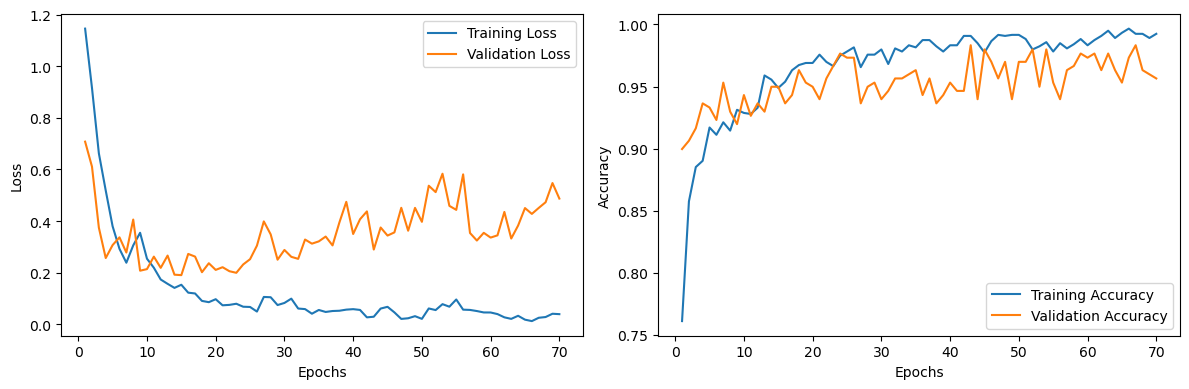

In [71]:
plot_accuracy_loss(
    history.history["loss"],
    history.history["accuracy"],
    history.history["val_loss"],
    history.history["val_accuracy"],
    model_type="CNN",
)

In [73]:
# Print Classification Report
print("Classification Report:\n", clr)

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.93      0.99      0.96       201
     NEUTRAL       1.00      0.98      0.99       231
    POSITIVE       0.96      0.93      0.95       208

    accuracy                           0.97       640
   macro avg       0.96      0.97      0.96       640
weighted avg       0.97      0.97      0.97       640



In [75]:
# Build a GRU-based model for multi-class classification

inputs = tf.keras.Input(shape=(X_train.shape[1],1))

gru = tf.keras.layers.GRU(256, return_sequences=True)(inputs)
flat = Flatten()(gru)
outputs = Dense(3, activation='softmax')(flat)

model_gru= tf.keras.Model(inputs, outputs)

model_gru.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 2548, 1)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 2548, 256)           │         198,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 652288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │       1,956,867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,779 (8.22 MB)

 Trainable params: 2,155,779 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Compile the model
opt_adam =tf.keras.optimizers.Adam(learning_rate=0.001)
model_gru.compile(optimizer=opt_adam,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
# Train the model
epoch=40
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint(filepath='best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

history1 = model_gru.fit(X_train, y_train,
                     validation_split=0.2, 
                     batch_size=32,
                     epochs=epoch,
                     callbacks=[es, mc, lr_schedule])

Epoch 1/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8218 - loss: 0.9800
Epoch 1: val_accuracy improved from -inf to 0.85953, saving model to best_model.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 234s 6s/step - accuracy: 0.8225 - loss: 0.9776 - val_accuracy: 0.8595 - val_loss: 0.6531 - learning_rate: 0.0010
Epoch 2/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9267 - loss: 0.3158
Epoch 2: val_accuracy improved from 0.85953 to 0.92308, saving model to best_model.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 227s 6s/step - accuracy: 0.9267 - loss: 0.3144 - val_accuracy: 0.9231 - val_loss: 0.2231 - learning_rate: 9.0484e-04
Epoch 3/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9404 - loss: 0.1261
Epoch 3: val_accuracy did not improve from 0.92308
38/38 ━━━━━━━━━━━━━━━━━━━━ 225s 6s/step - accuracy: 0.9407 - loss: 0.1258 - val_accuracy: 0.9164 - val_loss: 0.3932 - learning_rate: 8.1873e-04
Epoch 4/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9522 - loss: 0.1873
Epoch 4: val_accuracy improved from 0.92308 to 0.95318, saving model to best_model.h5


38/38 ━━━━━━━━━━━━━━━━━━━━ 222s 6s/step - accuracy: 0.9524 - loss: 0.1861 - val_accuracy: 0.9532 - val_loss: 0.1739 - learning_rate: 7.4082e-04
Epoch 5/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9860 - loss: 0.0656
Epoch 5: val_accuracy did not improve from 0.95318
38/38 ━━━━━━━━━━━━━━━━━━━━ 225s 6s/step - accuracy: 0.9860 - loss: 0.0654 - val_accuracy: 0.9431 - val_loss: 0.2027 - learning_rate: 6.7032e-04
Epoch 6/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9932 - loss: 0.0362
Epoch 6: val_accuracy did not improve from 0.95318
38/38 ━━━━━━━━━━━━━━━━━━━━ 222s 6s/step - accuracy: 0.9932 - loss: 0.0362 - val_accuracy: 0.9532 - val_loss: 0.2094 - learning_rate: 6.0653e-04
Epoch 7/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9976 - loss: 0.0272
Epoch 7: val_accuracy did not improve from 0.95318
38/38 ━━━━━━━━━━━━━━━━━━━━ 226s 6s/step - accuracy: 0.9976 - loss: 0.0271 - val_accuracy: 0.9532 - val_loss: 0.2050 - learning_rate: 5.4881e-04
Epoch 8/40
38/38 ━━━━━

38/38 ━━━━━━━━━━━━━━━━━━━━ 228s 6s/step - accuracy: 0.9991 - loss: 0.0187 - val_accuracy: 0.9565 - val_loss: 0.1765 - learning_rate: 4.9659e-04
Epoch 9/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 1.0000 - loss: 0.0147
Epoch 9: val_accuracy did not improve from 0.95652
38/38 ━━━━━━━━━━━━━━━━━━━━ 228s 6s/step - accuracy: 1.0000 - loss: 0.0147 - val_accuracy: 0.9565 - val_loss: 0.2342 - learning_rate: 4.4933e-04
Epoch 10/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 1.0000 - loss: 0.0108
Epoch 10: val_accuracy did not improve from 0.95652
38/38 ━━━━━━━━━━━━━━━━━━━━ 230s 6s/step - accuracy: 1.0000 - loss: 0.0108 - val_accuracy: 0.9532 - val_loss: 0.2045 - learning_rate: 4.0657e-04
Epoch 11/40
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 1.0000 - loss: 0.0081
Epoch 11: val_accuracy did not improve from 0.95652
38/38 ━━━━━━━━━━━━━━━━━━━━ 232s 6s/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.9431 - val_loss: 0.2424 - learning_rate: 3.6788e-04
Epoch 12/40
38/38 

In [79]:
model_gru_acc = model_gru.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_gru_acc * 100))

Test Accuracy: 95.156%


20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 624ms/step


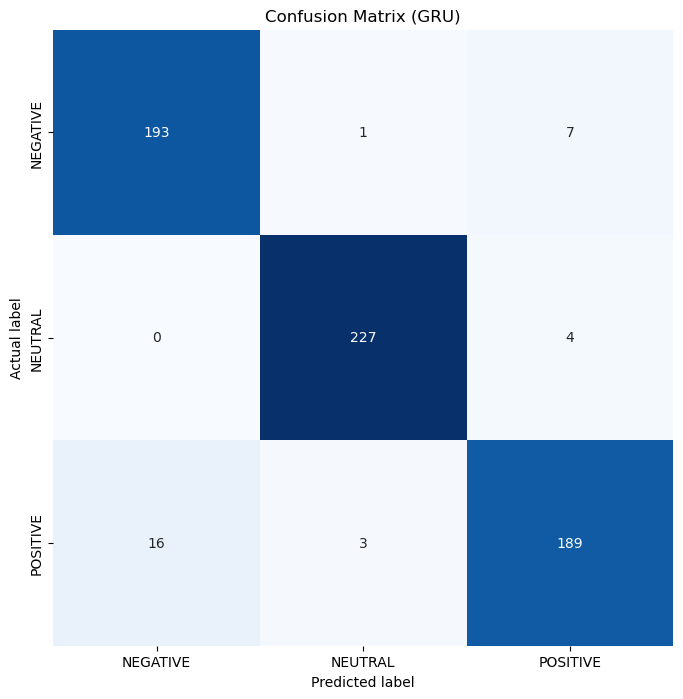

In [81]:
# Make predictions
y_pred = np.argmax(model_gru.predict(X_test), axis=-1)
# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix (GRU)')
plt.show()

In [49]:
X_train_pca = X_train_pca.astype('float32')
X_test_pca = X_test_pca.astype('float32')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test= le.transform(y_test)
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_pca.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

# 编译模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型
history = model.fit(X_train_pca, y_train, validation_split=0.2,
                    epochs=70, batch_size=32, verbose=2)

# 评估模型
model_acc = model.evaluate(X_test_pca, y_test, verbose=0)[1]

# 预测
y_pred = np.argmax(model.predict(X_test_pca), axis=-1)

Epoch 1/70
38/38 - 1s - 31ms/step - accuracy: 0.7117 - loss: 1.4080 - val_accuracy: 0.9097 - val_loss: 0.4482
Epoch 2/70
38/38 - 0s - 3ms/step - accuracy: 0.8391 - loss: 0.7138 - val_accuracy: 0.8930 - val_loss: 0.4042
Epoch 3/70
38/38 - 0s - 3ms/step - accuracy: 0.8541 - loss: 0.5724 - val_accuracy: 0.9097 - val_loss: 0.3016
Epoch 4/70
38/38 - 0s - 3ms/step - accuracy: 0.8684 - loss: 0.5596 - val_accuracy: 0.9164 - val_loss: 0.3055
Epoch 5/70
38/38 - 0s - 3ms/step - accuracy: 0.8877 - loss: 0.3990 - val_accuracy: 0.9231 - val_loss: 0.2458
Epoch 6/70
38/38 - 0s - 3ms/step - accuracy: 0.8969 - loss: 0.3553 - val_accuracy: 0.9130 - val_loss: 0.2555
Epoch 7/70
38/38 - 0s - 3ms/step - accuracy: 0.8919 - loss: 0.3063 - val_accuracy: 0.9197 - val_loss: 0.2457
Epoch 8/70
38/38 - 0s - 3ms/step - accuracy: 0.8986 - loss: 0.2922 - val_accuracy: 0.9197 - val_loss: 0.2308
Epoch 9/70
38/38 - 0s - 3ms/step - accuracy: 0.8952 - loss: 0.2638 - val_accuracy: 0.9264 - val_loss: 0.2296
Epoch 10/70
38/38 

In [51]:
# Evaluate the model
model_acc = model.evaluate(X_test_pca, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 96.406%


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


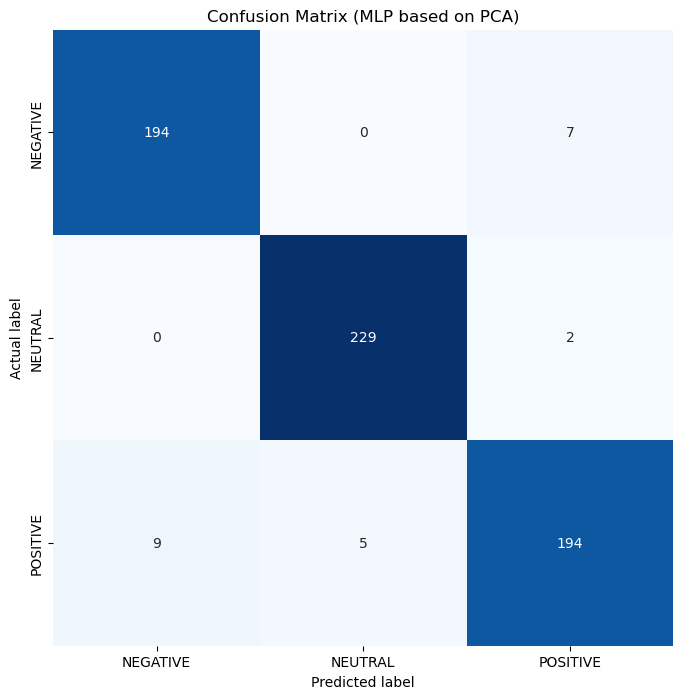

In [57]:
# Make predictions
y_pred = np.argmax(model.predict(X_test_pca), axis=-1)
# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix (MLP based on PCA)')
plt.show()

[Text(0, 0, 'GNB'),
 Text(1, 0, 'SVM'),
 Text(2, 0, 'LR'),
 Text(3, 0, 'Random Forest'),
 Text(4, 0, 'MLP'),
 Text(5, 0, 'GRU')]

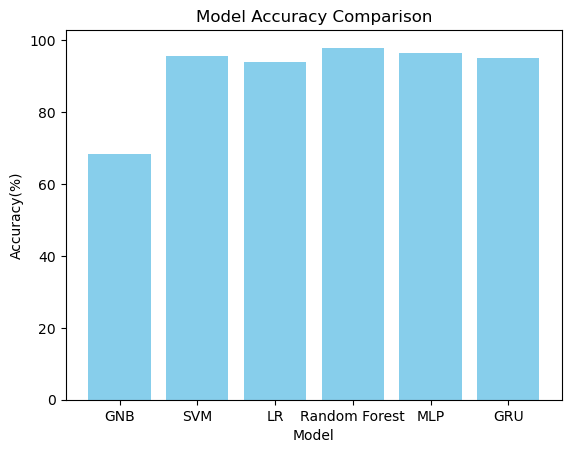

In [89]:
model_accuracies = [68.44, 95.625, 94.06, 97.97,96.56,95.156]
model_labels = ['GNB', 'SVM', 'LR', 'Random Forest','MLP','GRU']

x = np.arange(len(model_labels))  # 标签位置
width = 0.35  # 柱状图宽度

fig, ax = plt.subplots()
rects = ax.bar(x, model_accuracies, label='Accuracy', color='SkyBlue')

# 添加一些文本用于标签、标题和自定义x轴刻度等
ax.set_ylabel('Accuracy(%)')
ax.set_xlabel('Model')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(model_labels)

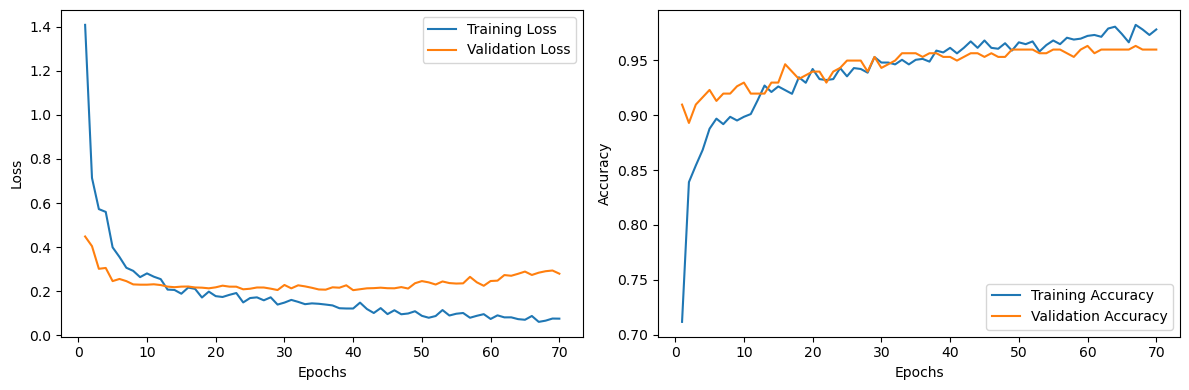

In [95]:
plot_accuracy_loss(
    history.history["loss"],
    history.history["accuracy"],
    history.history["val_loss"],
    history.history["val_accuracy"],
    model_type="CNN",
)